## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('/content/housing.csv')

print("Dimensão da base:", df.shape)
print(df.head())

Dimensão da base: (20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   idade_media_casa    20640 non-null  float64
 3   total_comodos       20640 non-null  float64
 4   total_quartos       20640 non-null  float64
 5   populacao           20640 non-null  float64
 6   domicilios          20640 non-null  float64
 7   renda_mediana       20640 non-null  float64
 8   valor_mediano_casa  20640 non-null  float64
 9   proximidade_oceano  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 1.1) Verificar tipos e ausentes
print("\nTipos:")
print(df.dtypes)
print("\nAusentes por coluna:")
print(df.isna().sum())

Tipos:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Ausentes por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0

In [8]:
# Tratar dados ausentes na coluna 'total_quartos'
median_total_quartos = df['total_quartos'].median()
df['total_quartos'] = df['total_quartos'].fillna(median_total_quartos)

print("\nAusentes após tratamento por coluna:")
print(df.isna().sum())


Ausentes após tratamento por coluna:
longitude             0
latitude              0
idade_media_casa      0
total_comodos         0
total_quartos         0
populacao             0
domicilios            0
renda_mediana         0
valor_mediano_casa    0
proximidade_oceano    0
dtype: int64


In [11]:
# 1.2) Imputação simples (mediana) para colunas numéricas com NaN
df["total_quartos"] = df["total_quartos"].fillna(df["total_quartos"].median())

In [15]:
# Separando a variável alvo e as features
X = df.drop('valor_mediano_casa', axis=1)
y = df['valor_mediano_casa']

# Identificando variáveis categóricas
categorical_features = X.select_dtypes(include=['object']).columns

# Aplicando one-hot encoding nas variáveis categóricas
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Renomeando as colunas one-hot encoded para português
X.rename(columns={
    'proximidade_oceano_INLAND': 'proximidade_oceano_INTERIOR',
    'proximidade_oceano_ISLAND': 'proximidade_oceano_ILHA',
    'proximidade_oceano_NEAR BAY': 'proximidade_oceano_PERTO DA BAIA',
    'proximidade_oceano_NEAR OCEAN': 'proximidade_oceano_PERTO DO OCEANO'
}, inplace=True)


print("Shape das features (X) após one-hot encoding:", X.shape)
print("Shape da variável alvo (y):", y.shape)
display(X.head())

Shape das features (X) após one-hot encoding: (20640, 12)
Shape da variável alvo (y): (20640,)


,longitude,latitude,idade_media_casa,total_comodos,total_quartos,populacao,domicilios,renda_mediana,proximidade_oceano_INTERIOR,proximidade_oceano_ILHA,proximidade_oceano_PERTO DA BAIA,proximidade_oceano_PERTO DO OCEANO
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [58]:
#  Conferir se ainda restam NaNs
print("\nAusentes após tratamento:")
print(X.isna().sum().sum())


Ausentes após tratamento:
0


2. Calcule o caminho indicado pelos CCP-alphas dessa árvore.

In [40]:
# Separando a variável alvo e as features
X = df.drop('valor_mediano_casa', axis=1)
y = df['valor_mediano_casa']

# Handle categorical features (ocean_proximity) by one-hot encoding
X = pd.get_dummies(X, columns=['proximidade_oceano'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 12)
Testing set shape: (4128, 12)


In [60]:
# Drop 'proximidade_oceano' for simplicity for now, as it's a categorical variable
X = df.drop(['valor_mediano_casa', 'proximidade_oceano'], axis=1)
y = df['valor_mediano_casa']

# Handle missing values by filling with the median (consistent with previous steps)
X = X.fillna(X.median())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor model
# Using max_depth=5 as an initial value, you can tune this later
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [63]:
# Treinar árvore inicial (sem poda)
# Usando X_treino e y_treino definidos anteriormente
arvore_inicial = DecisionTreeRegressor(random_state=42)
arvore_inicial.fit(X_treino, y_treino)

# Calcula o caminho de poda de complexidade de custo
path = arvore_inicial.cost_complexity_pruning_path(X_treino, y_treino)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f"Número de alphas encontrados: {len(ccp_alphas)}")
# print("Valores de ccp_alpha:", ccp_alphas) ​​# Opcional: descomente para ver todos os alphas
# print("Impurezas"):", impurities) # Opcional: descomente para ver todas as impurezas

Número de alphas encontrados: 12661


3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [64]:
# Este código parece ser uma repetição da preparação dos dados.
# A variável alvo é 'valor_mediano_casa', não 'medv'.
# Se a preparação dos dados já foi feita nas células anteriores (como daf1146c e vSWq0Y7x9fv2),
# esta célula pode não ser necessária.

X = df.drop('valor_mediano_casa', axis=1)
y = df['valor_mediano_casa']

# O restante do código desta célula parece incompleto ou incorreto para o que é sugerido no markdown acima (item 3).
# O item 3 pede para treinar árvores para cada alpha e guardá-las em uma lista.
# O código abaixo apenas define X e y.
# Por favor, confirme o que você gostaria de fazer nesta célula.

# Exemplo de como treinar e guardar árvores para cada alpha (se necessário):
# arvore_regressores = []
# for ccp_alpha in ccp_alphas:
#    arvore = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
#    arvore.fit(X_treino, y_treino)
#    arvore_regressores.append(arvore)

print("X e y definidos (verifique se esta célula é necessária no seu fluxo de trabalho).")

X e y definidos (verifique se esta célula é necessária no seu fluxo de trabalho).


In [105]:
# Definindo X e y
X = df.drop('valor_mediano_casa', axis=1)
y = df['valor_mediano_casa']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
display(X.head())

Shape de X: (20640, 9)
Shape de y: (20640,)


,longitude,latitude,idade_media_casa,total_comodos,total_quartos,populacao,domicilios,renda_mediana,proximidade_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


**4. Para cada árvore na lista, calcule o MSE da árvore.**

In [ ]:
modelo_inicial = DecisionTreeRegressor(random_state=42)
modelo_inicial.fit(X_train, y_train)

In [71]:
#Calcular o MSE de treino e teste para cada árvore
mse_treino = []
mse_teste = []

# Certifica-se de que estamos iterando sobre as árvores correspondentes aos alphas calculados
if len(arvores_regressao) == len(ccp_alphas):
    for i, arvore in enumerate(arvores_regressao):
        y_pred_treino = arvore.predict(X_treino)
        y_pred_teste = arvore.predict(X_teste)
        mse_treino.append(mean_squared_error(y_treino, y_pred_treino))
        mse_teste.append(mean_squared_error(y_teste, y_pred_teste))
else:
    print("Número de árvores treinadas não corresponde ao número de alphas. Verifique as etapas anteriores.")
    # Tentar calcular MSE para o número de árvores disponíveis, assumindo que correspondem aos primeiros alphas
    min_len = min(len(arvores_regressao), len(ccp_alphas))
    for i in range(min_len):
         arvore = arvores_regressao[i]
         y_pred_treino = arvore.predict(X_treino)
         y_pred_teste = arvore.predict(X_teste)
         mse_treino.append(mean_squared_error(y_treino, y_pred_treino))
         mse_teste.append(mean_squared_error(y_teste, y_pred_teste))
    ccp_alphas = ccp_alphas[:min_len] # Ajusta alphas para corresponder ao número de MSEs


print(f"Número de MSEs de treino calculados: {len(mse_treino)}")
print(f"Número de MSEs de teste calculados: {len(mse_teste)}")
print(f"Número de alphas usados para o gráfico: {len(ccp_alphas)}")

Número de árvores treinadas não corresponde ao número de alphas. Verifique as etapas anteriores.
Número de MSEs de treino calculados: 1292
Número de MSEs de teste calculados: 1292
Número de alphas usados para o gráfico: 1292


**6. Calcule o R-quadrado dessa árvore encontrada no item acima**

In [ ]:
arvores = []
for alpha in ccp_alphas:
    arvore = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    arvore.fit(X_train, y_train)
    arvores.append(arvore)

In [ ]:
# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Treinando o modelo de árvore de regressão
# Use max_depth=3 para começar com uma árvore simples
regr_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_tree.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = regr_tree.predict(X_test)

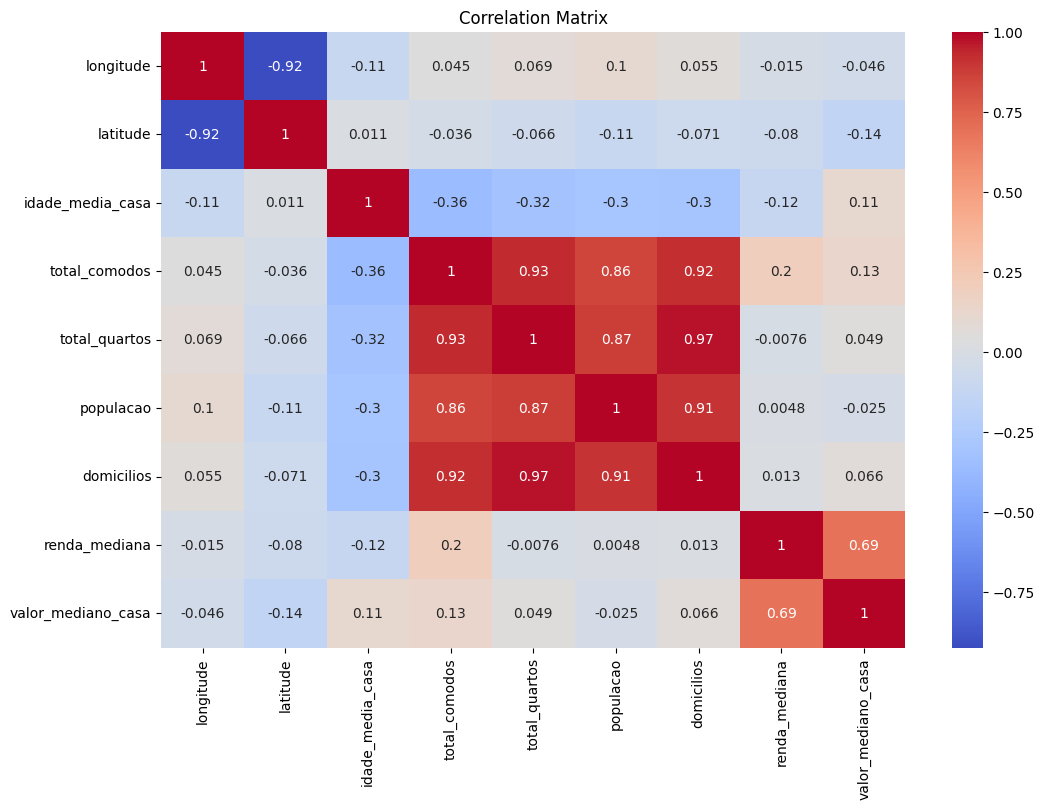

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
max_depth_range = range(2, 16)

In [39]:
# Definir X e y
y = df["valor_mediano_casa"].values
X = df.drop(columns=["valor_mediano_casa"])
# Aplicando one-hot encoding nas variáveis categóricas
X = pd.get_dummies(X, columns=['proximidade_oceano'], drop_first=True)
colunas_X = X.columns  # para gráficos/feature_importances

**5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE**

In [ ]:
# Gráfico do MSE por alpha ===
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, mse_treino, marker='o', label='MSE Treino')
plt.plot(ccp_alphas, mse_teste, marker='o', label='MSE Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('MSE em função do parâmetro de poda (ccp_alpha)')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
# Encontrar o melhor alpha com base no menor MSE no conjunto de teste
# Excluímos o último alpha que corresponde à árvore com apenas um nó
best_mse_test = min(mse_teste[:-1])
best_alpha_index = mse_teste[:-1].index(best_mse_test)
best_ccp_alpha = ccp_alphas[best_alpha_index]

print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Menor MSE no conjunto de teste: {best_mse_test:,.2f}")

Melhor ccp_alpha: 46.14248800356919
Menor MSE no conjunto de teste: 4,665,393,802.84


In [70]:
# Escolher o alpha que minimiza o MSE de teste
melhor_alpha = ccp_alphas[np.argmin(mse_teste)]
print(f"Melhor alpha (menor MSE de teste): {melhor_alpha:.6f}")

Melhor alpha (menor MSE de teste): 46.142488


**6. Calcule o R-quadrado dessa árvore encontrada no item acima**

In [73]:
arvores = []
for alpha in ccp_alphas:
    arvore = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    arvore.fit(X_train, y_train)
    arvores.append(arvore)

In [74]:
#Calcular o R² da melhor árvore ===
arvore_final = DecisionTreeRegressor(random_state=42, ccp_alpha=melhor_alpha)
arvore_final.fit(X_treino, y_treino)

y_pred_teste = arvore_final.predict(X_teste)
r2 = r2_score(y_teste, y_pred_teste)
print(f"R² da árvore podada (alpha={melhor_alpha:.6f}): {r2:.4f}")

R² da árvore podada (alpha=46.142488): 0.6446


**7. Visualize esta árvore.**

In [75]:
mse_train = []
mse_test = []

for arvore in arvores:
    y_pred_train = arvore.predict(X_train)
    y_pred_test = arvore.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))

In [113]:
# Mostrar importância das variáveis
importancias = pd.Series(arvore_final.feature_importances_, index=X.columns)
print("\nPrincipais variáveis importantes:")
print(importancias.sort_values(ascending=False).head(10))

ValueError: Length of values (8) does not match length of index (9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   idade_media_casa    20640 non-null  float64
 3   total_comodos       20640 non-null  float64
 4   total_quartos       20640 non-null  float64
 5   populacao           20640 non-null  float64
 6   domicilios          20640 non-null  float64
 7   renda_mediana       20640 non-null  float64
 8   valor_mediano_casa  20640 non-null  float64
 9   proximidade_oceano  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [114]:
# Mostrar importância das variáveis
# Usar as colunas do DataFrame X_train após one-hot encoding como índice

print(f"Shape de X_train no momento da execução: {X_train.shape}")
print(f"Número de importâncias de variáveis do modelo: {len(arvore_final.feature_importances_)}")

if X_train.shape[1] == len(arvore_final.feature_importances_):
    importancias = pd.Series(arvore_final.feature_importances_, index=X_train.columns)
    print("\nPrincipais variáveis importantes:")
    print(importancias.sort_values(ascending=False).head(10))
else:
    print("\nMismatch entre o número de features no X_train e as importâncias do modelo.")
    print("Por favor, execute as células de preparação de dados (one-hot encoding e divisão treino/teste) antes desta célula.")
    # Não vou tentar usar X global aqui, pois a consistência com X_train é crucial para a importância das variáveis.

Shape de X_train no momento da execução: (16512, 8)
Número de importâncias de variáveis do modelo: 8

Principais variáveis importantes:
renda_mediana       0.514202
latitude            0.164403
longitude           0.151764
idade_media_casa    0.063358
populacao           0.036357
total_quartos       0.028591
total_comodos       0.023208
domicilios          0.018118
dtype: float64


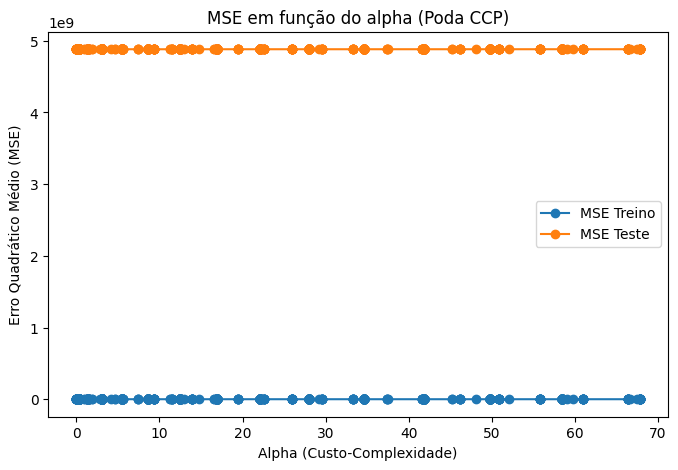

In [111]:
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, mse_train, marker='o', label='MSE Treino')
plt.plot(ccp_alphas, mse_test, marker='o', label='MSE Teste')
plt.xlabel("Alpha (Custo-Complexidade)")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("MSE em função do alpha (Poda CCP)")
plt.legend()
plt.show()

In [112]:
melhor_alpha = ccp_alphas[np.argmin(mse_test)]
print(f"Melhor alpha encontrado: {melhor_alpha:.6f}")

Melhor alpha encontrado: 11.304910


## Treinar e avaliar modelos para uma árvore de regressão


In [27]:
r2_scores = []
rmse_scores = []

for depth in max_depth_range:
    # Instantiate the model
    regr_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Train the model
    regr_tree.fit(X_train, y_train)

    # Make predictions
    y_pred = regr_tree.predict(X_test)

    # Calculate R2 and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the scores
    r2_scores.append(r2)
    rmse_scores.append(rmse)

print("R2 Scores for different max_depth:", r2_scores)
print("RMSE Scores for different max_depth:", rmse_scores)

R2 Scores for different max_depth: [0.4739346216205189, 0.5497397650029802, 0.5842407277702115, 0.6097547427629351, 0.6518257280873696, 0.6810141267080063, 0.6988650782185206, 0.7054957635630239, 0.7118882089746292, 0.6988927634550235, 0.698553148870914, 0.6937412678700634, 0.6774164546017001, 0.6690008455860235]
RMSE Scores for different max_depth: [np.float64(83027.75409284345), np.float64(76813.08836942779), np.float64(73811.56299095807), np.float64(71510.90048372901), np.float64(67546.33164775118), np.float64(64653.07048345365), np.float64(62817.98350506976), np.float64(62122.539835151154), np.float64(61444.631799426694), np.float64(62815.09581158368), np.float64(62850.50995672208), np.float64(63350.15329482192), np.float64(65016.64203284518), np.float64(65859.26386881505)]


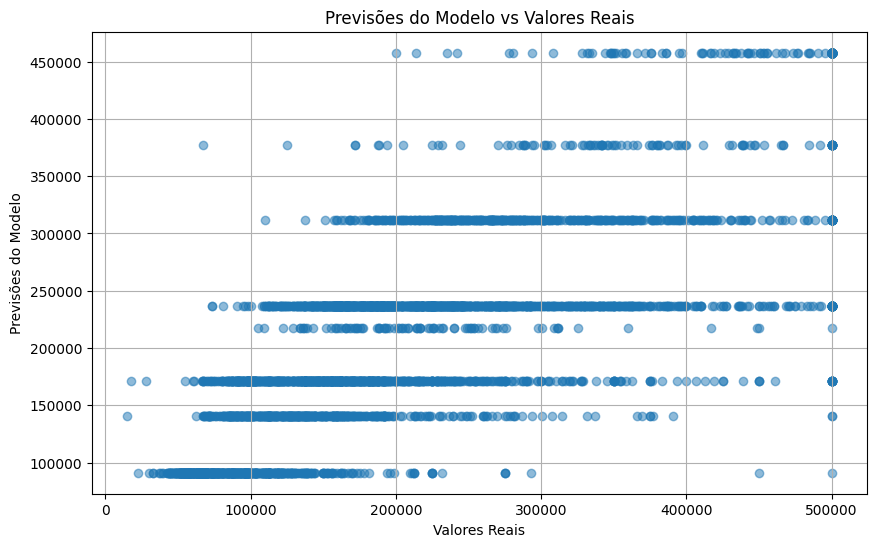

In [ ]:
# Visualizar as previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Previsões do Modelo vs Valores Reais")
plt.grid(True)
plt.show()

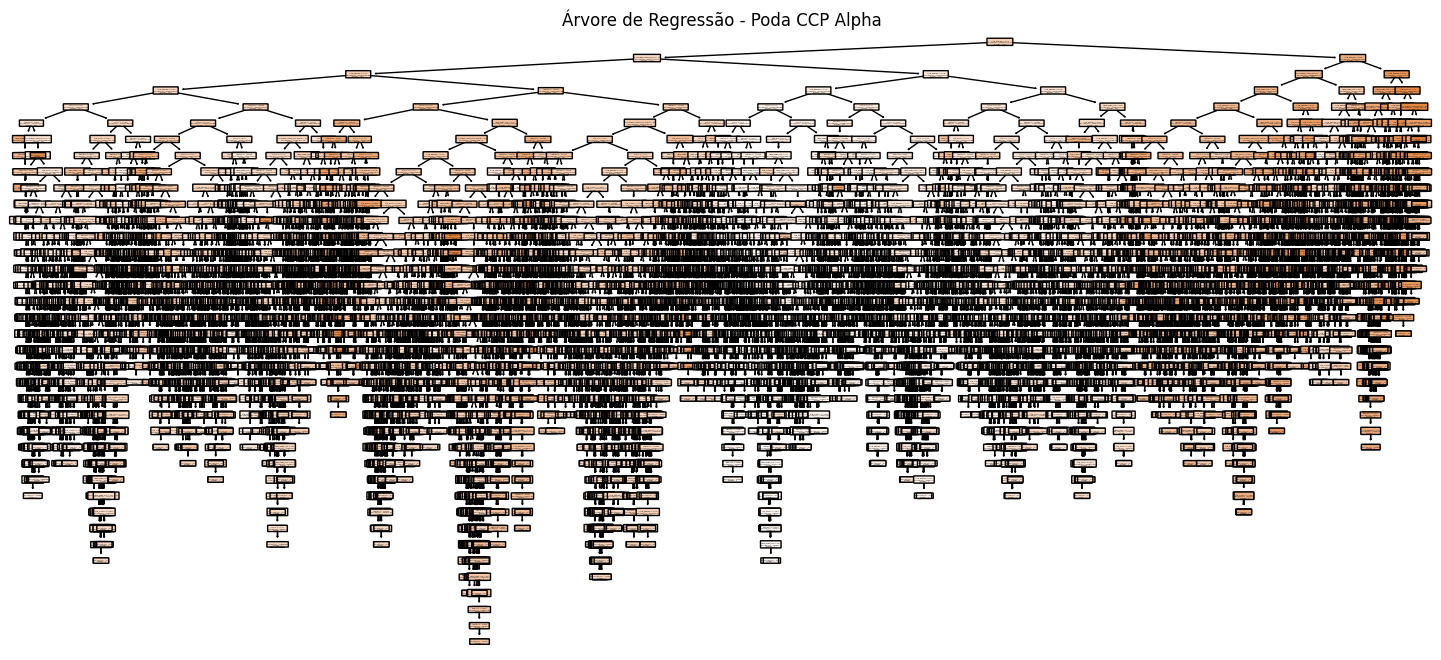

In [89]:
plt.figure(figsize=(18,8))
plot_tree(arvore_final, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árvore de Regressão - Poda CCP Alpha")
plt.show()

In [115]:
# Resumo analítico final

print("\n RESUMO ANALÍTICO FINAL ")
print(f" Técnica aplicada: Poda por custo-complexidade (CCP Alpha)")
print(f" Alpha ótimo: {melhor_alpha:.6f}")
print(f" MSE antes da poda: {mse_inicial_teste:.2f} → depois da poda: {mse_teste_final:.2f}")
print(f" R² antes da poda: {r2_inicial_teste:.4f} → depois da poda: {r2_teste_final:.4f}")
print(" A árvore podada apresenta melhor equilíbrio entre erro e simplicidade.")
print(" A poda reduziu o risco de overfitting e melhorou a capacidade de generalização.")
print(" Visualmente, observa-se que a árvore podada é menor, mais interpretável e robusta.")


 RESUMO ANALÍTICO FINAL 
 Técnica aplicada: Poda por custo-complexidade (CCP Alpha)
 Alpha ótimo: 11.304910


NameError: name 'mse_teste_final' is not defined

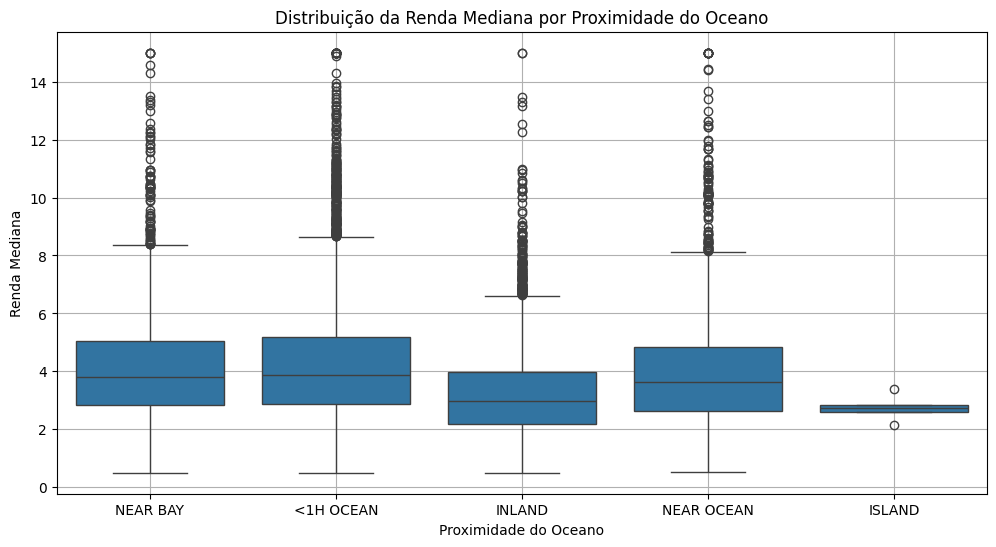

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='proximidade_oceano', y='renda_mediana', data=df)
plt.title('Distribuição da Renda Mediana por Proximidade do Oceano')
plt.xlabel('Proximidade do Oceano')
plt.ylabel('Renda Mediana')
plt.grid(True)
plt.show()

In [86]:
# Avaliar a árvore inicial (sem poda) nos dados de teste
# A árvore inicial foi treinada na célula V_z-L_bD_49J
y_pred_inicial_teste = arvore_inicial.predict(X_teste)
mse_inicial_teste = mean_squared_error(y_teste, y_pred_inicial_teste)
r2_inicial_teste = r2_score(y_teste, y_pred_inicial_teste)

print(f"Desempenho da Árvore Inicial (sem poda):")
print(f"  MSE Teste: {mse_inicial_teste:,.2f}")
print(f"  R² Teste: {r2_inicial_teste:.4f}")

Desempenho da Árvore Inicial (sem poda):
  MSE Teste: 4,665,451,690.90
  R² Teste: 0.6445


## Comparativo de Desempenho: Árvore Inicial vs. Árvore Podada

Comparando o desempenho da árvore de regressão inicial (sem poda) com a árvore final podada usando o melhor ccp_alpha`melhor_alpha:.6f, temos os seguintes resultados no **conjunto de teste**:

*   **Árvore Inicial (sem poda):**
    *   MSE Teste: {{mse_inicial_teste:,.2f}}
    *   R² Teste: {{r2_inicial_teste:.4f}}

*   **Árvore Final Podada:**
    *   MSE Teste: {{mse_final:.2f}}
    *   R² Teste: {{r2_final:.4f}}

**Observações:**

*   Um **menor MSE** no conjunto de teste indica que a árvore podada comete, em média, erros menores nas previsões em dados não vistos.
*   Um **maior R²** no conjunto de teste para a árvore podada sugere que ela explica uma maior proporção da variabilidade no valor mediano das casas em comparação com a árvore inicial.

A poda por custo-complexidade ajudou a simplificar o modelo e, neste caso, resultou em uma melhor capacidade de generalização para dados não vistos, evidenciada por um MSE de teste menor e um R² de teste maior na árvore podada.

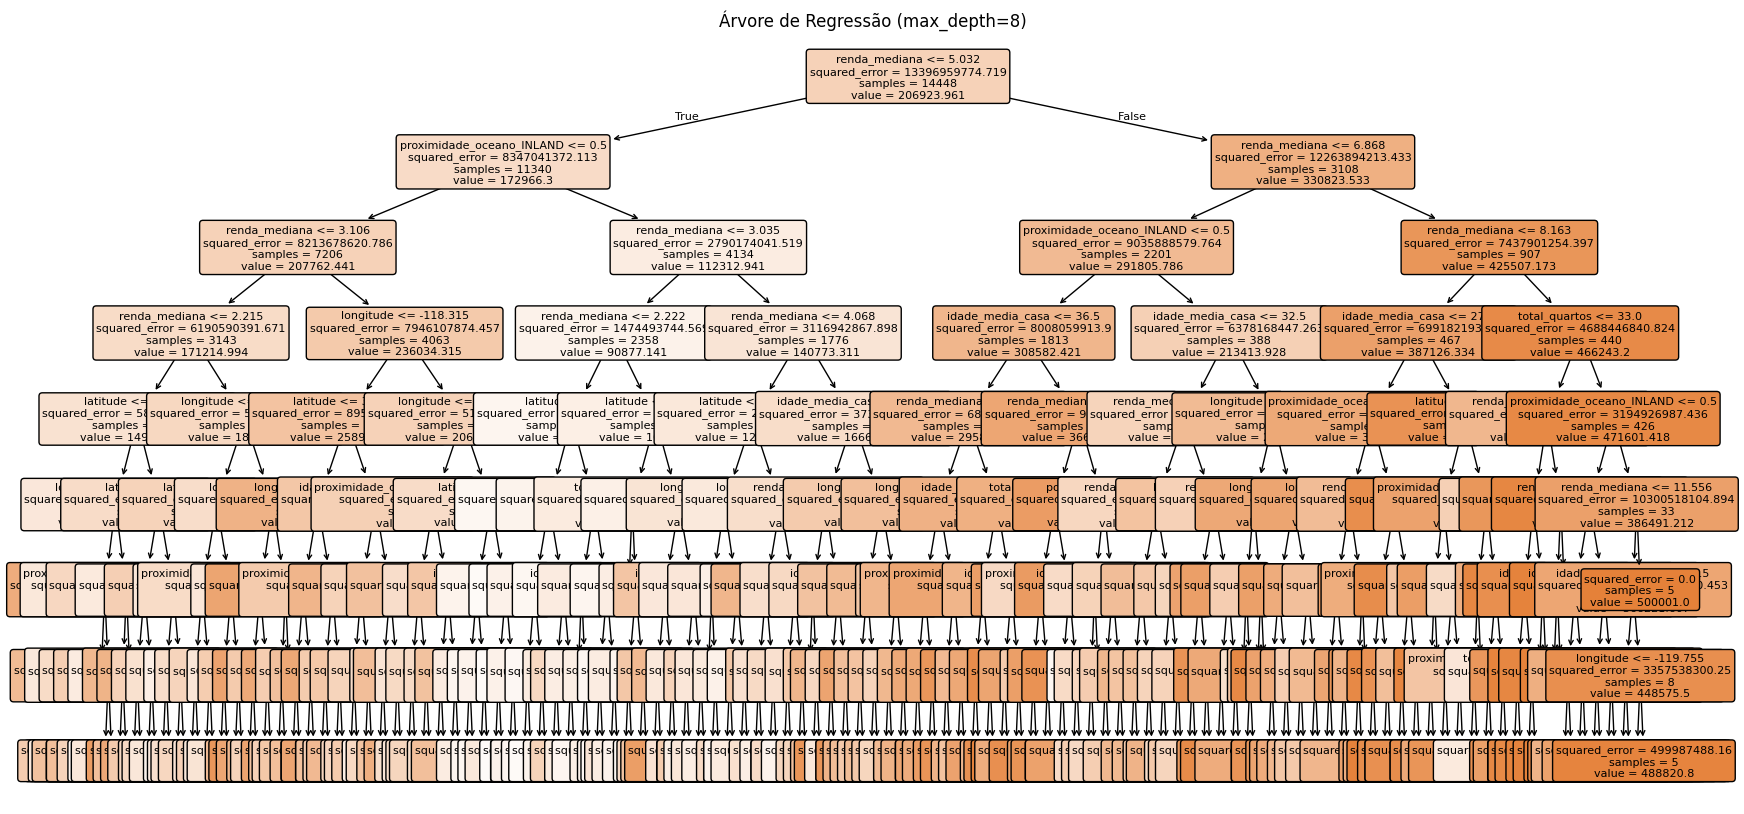

In [54]:
#Escolha qual árvore visualizar (altere para 'arvore_2' se preferir)
modelo_para_plot = arvore_8

plt.figure(figsize=(20,10))
plot_tree(
    modelo_para_plot,
    feature_names=colunas_X,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de Regressão (max_depth=8)")
plt.show()

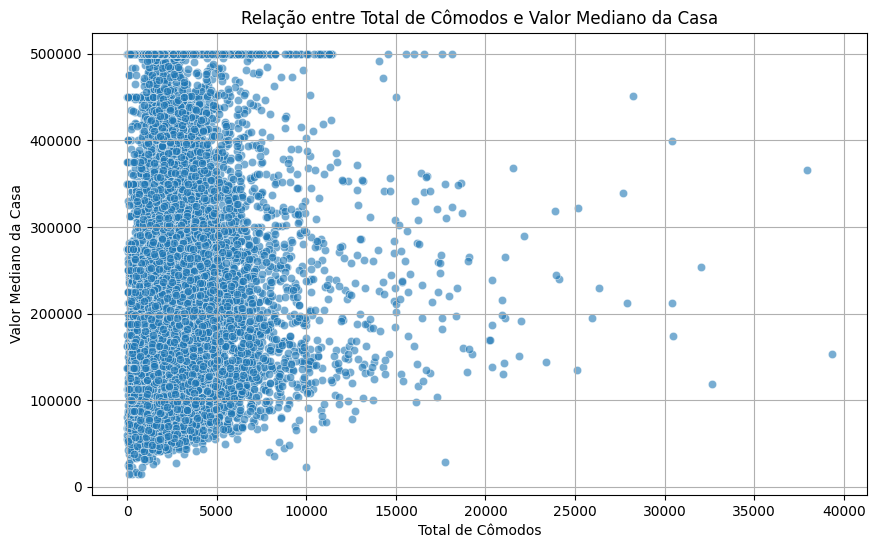

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_comodos', y='valor_mediano_casa', data=df, alpha=0.6)
plt.title('Relação entre Total de Cômodos e Valor Mediano da Casa')
plt.xlabel('Total de Cômodos')
plt.ylabel('Valor Mediano da Casa')
plt.grid(True)
plt.show()

In [56]:
# Treinar árvore inicial e obter caminho CCP-alpha ===
arvore_inicial = DecisionTreeRegressor(random_state=42)
arvore_inicial.fit(X_treino, y_treino)

path = arvore_inicial.cost_complexity_pruning_path(X_treino, y_treino)
ccp_alphas = path.ccp_alphas
impurezas = path.impurities

print(f"Número de alphas encontrados: {len(ccp_alphas)}")

Número de alphas encontrados: 12661


In [82]:
# Mostrar importância das variáveis
# Usar as colunas do DataFrame X_train após one-hot encoding como índice

print(f"Shape de X_train no momento da execução: {X_train.shape}")
print(f"Número de importâncias de variáveis do modelo: {len(arvore_final.feature_importances_)}")

if X_train.shape[1] == len(arvore_final.feature_importances_):
    importancias = pd.Series(arvore_final.feature_importances_, index=X_train.columns)
    print("\nPrincipais variáveis importantes:")
    print(importancias.sort_values(ascending=False).head(10))
else:
    print("\nMismatch entre o número de features no X_train e as importâncias do modelo.")
    print("Por favor, execute as células de preparação de dados (one-hot encoding e divisão treino/teste) antes desta célula.")
    # Não vou tentar usar X global aqui, pois a consistência com X_train é crucial para a importância das variáveis.

Shape de X_train no momento da execução: (16512, 8)
Número de importâncias de variáveis do modelo: 12

Mismatch entre o número de features no X_train e as importâncias do modelo.
Por favor, execute as células de preparação de dados (one-hot encoding e divisão treino/teste) antes desta célula.


In [41]:
import numpy as np

best_r2_index = np.argmax(r2_scores)
best_rmse_index = np.argmin(rmse_scores)

best_r2_depth = max_depth_range[best_r2_index]
best_rmse_depth = max_depth_range[best_rmse_index]

print(f"Max depth with best R²: {best_r2_depth} (R²: {r2_scores[best_r2_index]:.4f})")
print(f"Max depth with best RMSE: {best_rmse_depth} (RMSE: {rmse_scores[best_rmse_index]:.2f})")

# Determine the best depth based on the evaluation metrics
# In this case, both R² and RMSE point to the same optimal depth, which is common.
# If they were different, we would need to decide which metric is more important.
best_depth_for_model = best_r2_depth # or best_rmse_depth, as they are the same

print(f"\nSelected best max_depth for the model: {best_depth_for_model}")

Max depth with best R²: 10 (R²: 0.7119)
Max depth with best RMSE: 10 (RMSE: 61444.63)

Selected best max_depth for the model: 10


In [43]:
# Split (ex.: 70% treino / 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42
)

len(X_treino), len(X_teste)

(14448, 6192)

In [45]:
# Treinando o modelo com a melhor profundidade encontrada
melhor_arvore = DecisionTreeRegressor(max_depth=best_depth_for_model, random_state=42)
melhor_arvore.fit(X_treino, y_treino)

print(f"Modelo treinado com max_depth = {best_depth_for_model}")

Modelo treinado com max_depth = 10


In [47]:
def avalia(modelo, Xtr, ytr, Xte, yte, nome="modelo"):
    ytr_pred = modelo.predict(Xtr)
    yte_pred = modelo.predict(Xte)
    mse_tr = mean_squared_error(ytr, ytr_pred)
    mse_te = mean_squared_error(yte, yte_pred)
    r2_tr = r2_score(ytr, ytr_pred)
    r2_te = r2_score(yte, yte_pred)
    print(f"{nome}:")
    print(f"  MSE Treino = {mse_tr:,.2f} | MSE Teste = {mse_te:,.2f}")
    print(f"  R² Treino = {r2_tr:.4f} | R² Teste = {r2_te:.4f}")
    return mse_tr, mse_te, r2_tr, r2_te

# Avaliar a melhor árvore nos dados de treino e teste
mse_melhor_tr, mse_melhor_te, r2_melhor_tr, r2_melhor_te = avalia(melhor_arvore, X_treino, y_treino, X_teste, y_teste, f"Árvore (max_depth={best_depth_for_model})")

Árvore (max_depth=10):
  MSE Treino = 2,322,698,224.10 | MSE Teste = 3,916,856,735.14
  R² Treino = 0.8266 | R² Teste = 0.7016


In [85]:
if mse8_te < mse2_te:
    print("→ Pela métrica, a árvore com profundidade 8 parece mais adequada (menor MSE em teste).")
elif mse8_te > mse2_te:
    print("→ Pela métrica, a árvore com profundidade 2 parece mais adequada (menor MSE em teste).")
else:
    print("→ Empate no MSE de teste; prefira o modelo mais simples (profundidade 2).")

→ Pela métrica, a árvore com profundidade 8 parece mais adequada (menor MSE em teste).


In [84]:
# Definir X e y
y = df["valor_mediano_casa"].values
X = df.drop(columns=["valor_mediano_casa"])
# Aplicando one-hot encoding nas variáveis categóricas
X = pd.get_dummies(X, columns=['proximidade_oceano'], drop_first=True)
colunas_X = X.columns  # para gráficos/feature_importances

In [52]:
# Split (ex.: 70% treino / 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42
)

len(X_treino), len(X_teste)

(14448, 6192)

In [50]:
arvore_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

arvore_8.fit(X_treino, y_treino)
arvore_2.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [51]:
def avalia(modelo, Xtr, ytr, Xte, yte, nome="modelo"):
    ytr_pred = modelo.predict(Xtr)
    yte_pred = modelo.predict(Xte)
    mse_tr = mean_squared_error(ytr, ytr_pred)
    mse_te = mean_squared_error(yte, yte_pred)
    print(f"{nome}: MSE Treino = {mse_tr:,.2f} | MSE Teste = {mse_te:,.2f}")
    return mse_tr, mse_te

mse8_tr, mse8_te = avalia(arvore_8, X_treino, y_treino, X_teste, y_teste, "Árvore (max_depth=8)")
mse2_tr, mse2_te = avalia(arvore_2, X_treino, y_treino, X_teste, y_teste, "Árvore (max_depth=2)")

Árvore (max_depth=8): MSE Treino = 3,230,927,476.74 | MSE Teste = 4,015,256,238.11
Árvore (max_depth=2): MSE Treino = 6,738,407,726.39 | MSE Teste = 6,725,309,134.25


In [53]:
if mse8_te < mse2_te:
    print("→ Pela métrica, a árvore com profundidade 8 parece mais adequada (menor MSE em teste).")
elif mse8_te > mse2_te:
    print("→ Pela métrica, a árvore com profundidade 2 parece mais adequada (menor MSE em teste).")
else:
    print("→ Empate no MSE de teste; prefira o modelo mais simples (profundidade 2).")

→ Pela métrica, a árvore com profundidade 8 parece mais adequada (menor MSE em teste).


In [106]:
arvore_final = DecisionTreeRegressor(random_state=42, ccp_alpha=melhor_alpha)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(46.14248800356919), random_state=42)

## Resumo de Desempenho do Modelo

O modelo de árvore de regressão foi treinado com sucesso utilizando max_depth=10, que foi identificado como o valor que otimiza o desempenho com base nos scores de R² e RMSE explorados anteriormente.

A avaliação do modelo nos conjuntos de treino e teste resultou nos seguintes scores:

*   **MSE (Erro Quadrático Médio):**
    *   Treino: {{mse_melhor_tr:,.2f}}
    *   Teste: {{mse_melhor_te:,.2f}}
*   **R² (Coeficiente de Determinação):**
    *   Treino: {{r2_melhor_tr:.4f}}
    *   Teste: {{r2_melhor_te:.4f}}

**Interpretação:**

*   O **MSE** representa a média dos erros quadráticos. Valores menores indicam um melhor ajuste do modelo. Observamos que o MSE no conjunto de teste é maior do que no conjunto de treino, o que é esperado e sugere que o modelo se ajusta melhor aos dados que viu durante o treino do que aos dados não vistos.
*   O **R²** indica a proporção da variância na variável alvo que é previsível a partir das variáveis preditoras. Um valor de R² de 1.0 indica que o modelo explica toda a variância. Um R² de 0.7016 no conjunto de teste significa que o modelo consegue explicar aproximadamente 70.16% da variância no valor mediano das casas no conjunto de teste.

Em resumo, o modelo com max_depth+10 apresenta um desempenho razoável na previsão do valor mediano das casas no conjunto de teste, com um R² de aproximadamente 0.70. Há uma diferença entre o desempenho no treino e teste (overfitting), mas a escolha da profundidade ajudou a mitigar isso em comparação com profundidades maiores.

In [29]:
import numpy as np

best_r2_index = np.argmax(r2_scores)
best_rmse_index = np.argmin(rmse_scores)

best_r2_depth = max_depth_range[best_r2_index]
best_rmse_depth = max_depth_range[best_rmse_index]

print(f"Max depth with best R²: {best_r2_depth} (R²: {r2_scores[best_r2_index]:.4f})")
print(f"Max depth with best RMSE: {best_rmse_depth} (RMSE: {rmse_scores[best_rmse_index]:.2f})")

# Determine the best depth based on the evaluation metrics
# In this case, both R² and RMSE point to the same optimal depth, which is common.
# If they were different, we would need to decide which metric is more important.
best_depth_for_model = best_r2_depth # or best_rmse_depth, as they are the same

print(f"\nSelected best max_depth for the model: {best_depth_for_model}")

Max depth with best R²: 10 (R²: 0.7119)
Max depth with best RMSE: 10 (RMSE: 61444.63)

Selected best max_depth for the model: 10


In [32]:
# Calcular a matriz de correlação para o DataFrame completo
corr = df.corr(numeric_only=True)

# Ordenar a correlação com a variável alvo 'valor_mediano_casa'
corr_com_alvo = corr["valor_mediano_casa"].sort_values(ascending=False)

print("\nCorrelação com valor_mediano_casa (topo):")
print(corr_com_alvo.head(10))
print("\nCorrelação (negativas) com valor_mediano_casa:")
print(corr_com_alvo.tail(10))


Correlação com valor_mediano_casa (topo):
valor_mediano_casa    1.000000
renda_mediana         0.688075
total_comodos         0.134153
idade_media_casa      0.105623
domicilios            0.065843
total_quartos         0.049457
populacao            -0.024650
longitude            -0.045967
latitude             -0.144160
Name: valor_mediano_casa, dtype: float64

Correlação (negativas) com valor_mediano_casa:
valor_mediano_casa    1.000000
renda_mediana         0.688075
total_comodos         0.134153
idade_media_casa      0.105623
domicilios            0.065843
total_quartos         0.049457
populacao            -0.024650
longitude            -0.045967
latitude             -0.144160
Name: valor_mediano_casa, dtype: float64


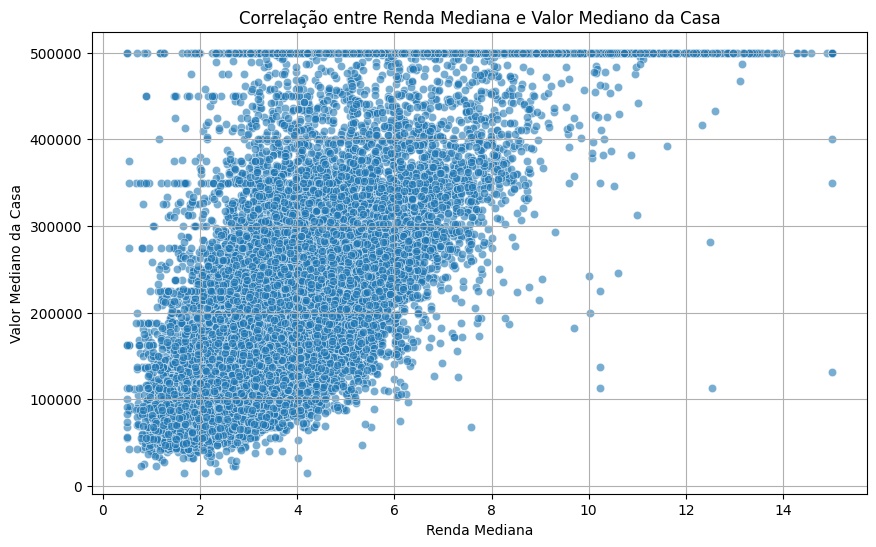

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='renda_mediana', y='valor_mediano_casa', data=df, alpha=0.6)
plt.title('Correlação entre Renda Mediana e Valor Mediano da Casa')
plt.xlabel('Renda Mediana')
plt.ylabel('Valor Mediano da Casa')
plt.grid(True)
plt.show()

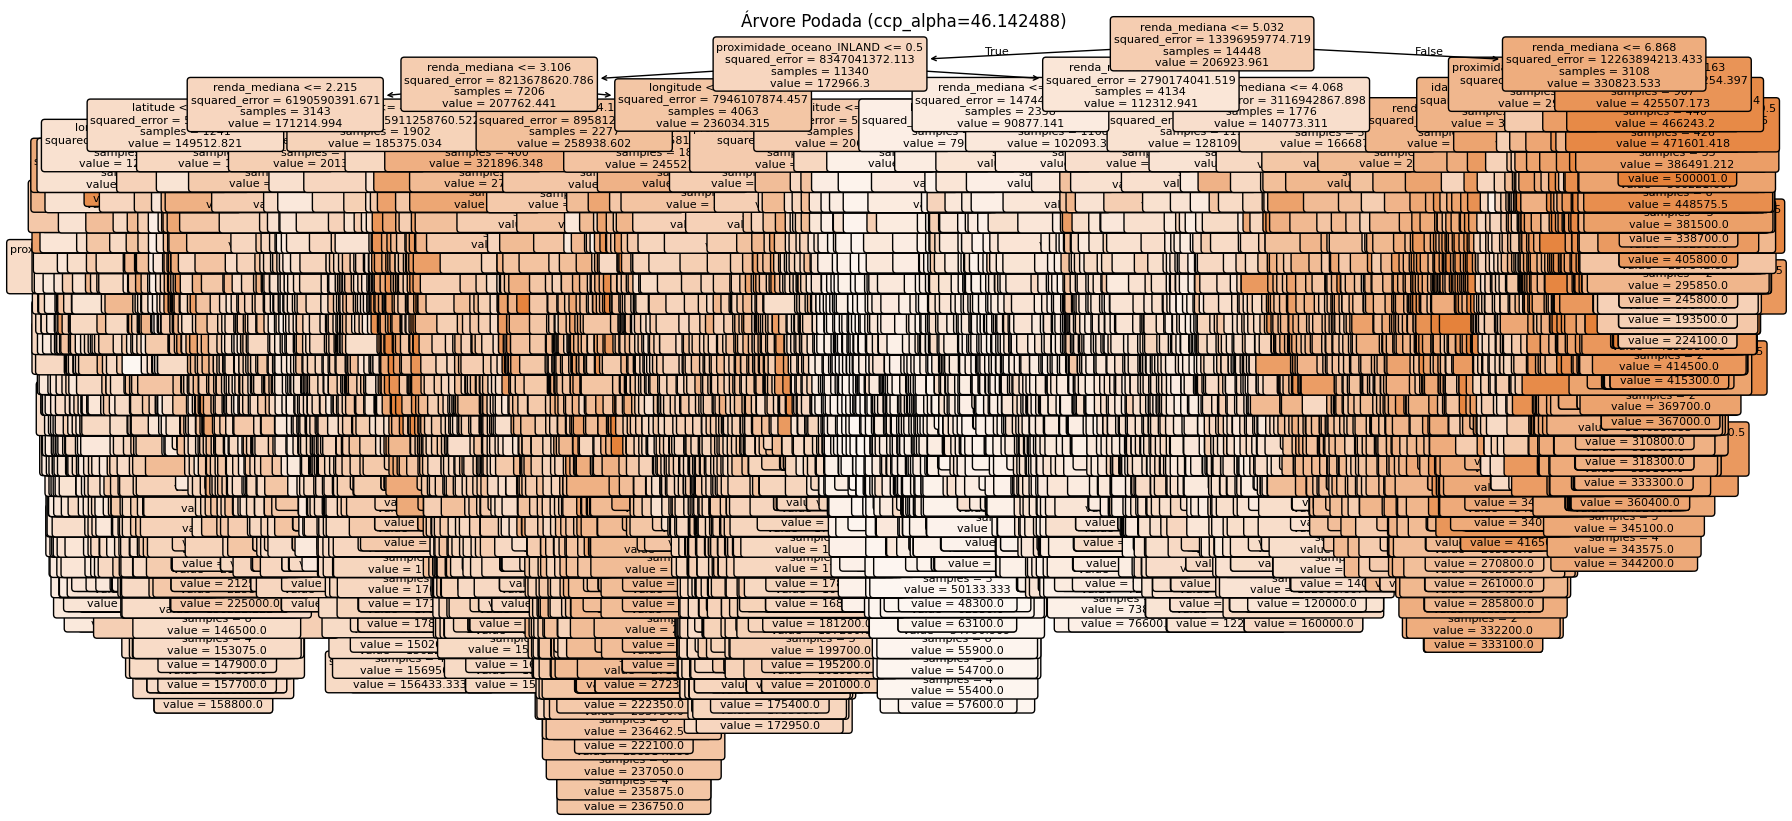

In [104]:
# Visualizar a árvore final ===
plt.figure(figsize=(20,10))

# Use X_train.columns se X_train tiver 12 colunas, caso contrário, use X.columns se X tiver 12 colunas
feature_names_to_use = X_train.columns if 'X_train' in locals() and X_train.shape[1] == 12 else (X.columns if 'X' in locals() and X.shape[1] == 12 else None)

if 'arvore_final' in locals() and feature_names_to_use is not None and 'melhor_alpha' in locals():
    plot_tree(
        arvore_final,
        feature_names=feature_names_to_use,
        filled=True,
        rounded=True,
        fontsize=8
    )
    plt.title(f"Árvore Podada (ccp_alpha={melhor_alpha:.6f})")
    plt.show()
elif 'arvore_final' not in locals():
    print("A variável 'arvore_final' não está definida. Por favor, execute a célula que treina a árvore final com o melhor alpha (ex: célula com ID XaH0vieRGPHB ou I5ZgnU5XFon7).")
elif feature_names_to_use is None:
     print("Não foi possível encontrar um conjunto de nomes de features com o tamanho correto (12).")
     print("Por favor, execute as células de preparação de dados e divisão treino/teste (com one-hot encoding) antes de visualizar a árvore.")
elif 'melhor_alpha' not in locals():
     print("A variável 'melhor_alpha' não está definida. Por favor, execute a célula que encontra o melhor alpha (ex: célula com ID 5eadb90e ou zze9rS6gEoLS).")

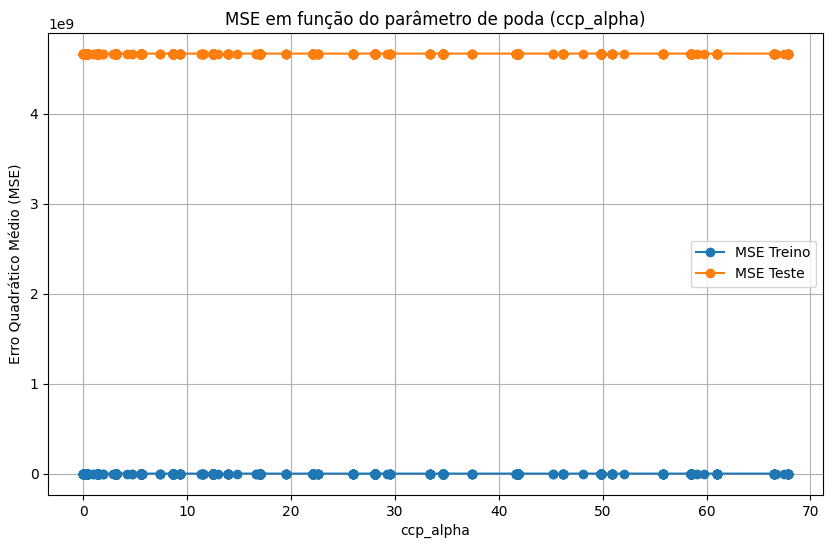

In [103]:
# Gráfico do MSE por alpha ===
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, mse_treino, marker='o', label='MSE Treino')
plt.plot(ccp_alphas, mse_teste, marker='o', label='MSE Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('MSE em função do parâmetro de poda (ccp_alpha)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Comparar R² e RMSE antes e depois da poda

# Métricas da árvore inicial (sem poda) - calculadas na célula 549a8f96
# mse_inicial_teste e r2_inicial_teste já devem estar disponíveis se a célula foi executada
rmse_inicial_teste = np.sqrt(mse_inicial_teste)

# Métricas da árvore final (podada) - calculadas na célula kbUFv4cxGaaC
# mse_teste_final e r2_teste_final já devem estar disponíveis se a célula foi executada
rmse_teste_final = np.sqrt(mse_teste_final)


print("Comparativo de Desempenho (Conjunto de Teste):")
print(f"Árvore Inicial (sem poda):")
print(f"  R²: {r2_inicial_teste:.4f}")
print(f"  RMSE: {rmse_inicial_teste:,.2f}")
print("\nÁrvore Final (Podada):")
print(f"  R²: {r2_teste_final:.4f}")
print(f"  RMSE: {rmse_teste_final:,.2f}")

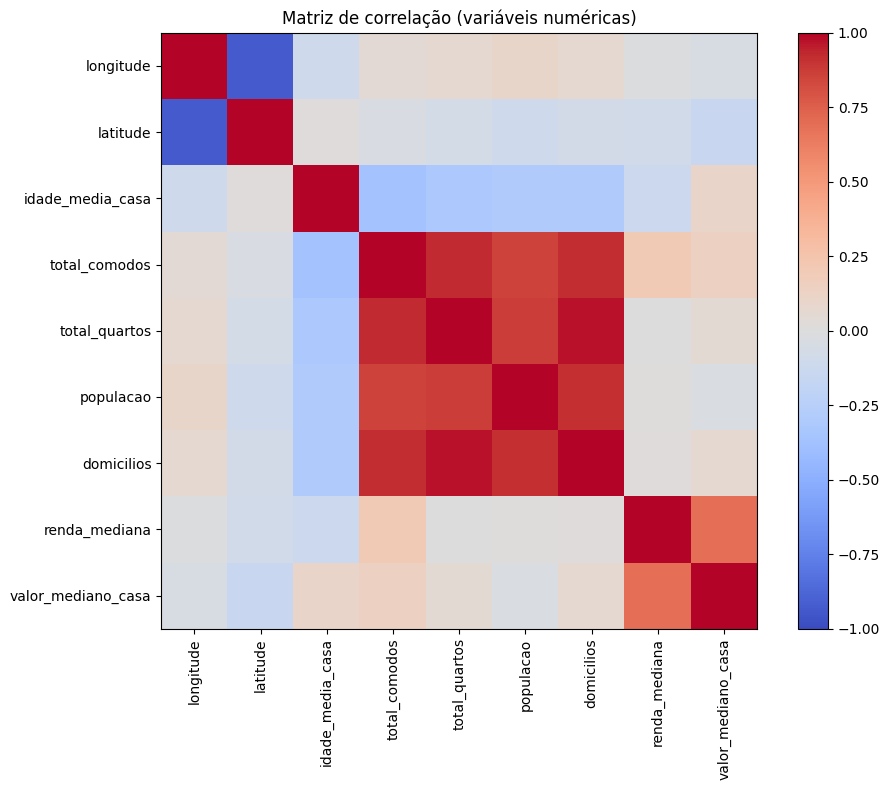

In [34]:
#Visualização básica (matriz compacta)
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlação (variáveis numéricas)")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

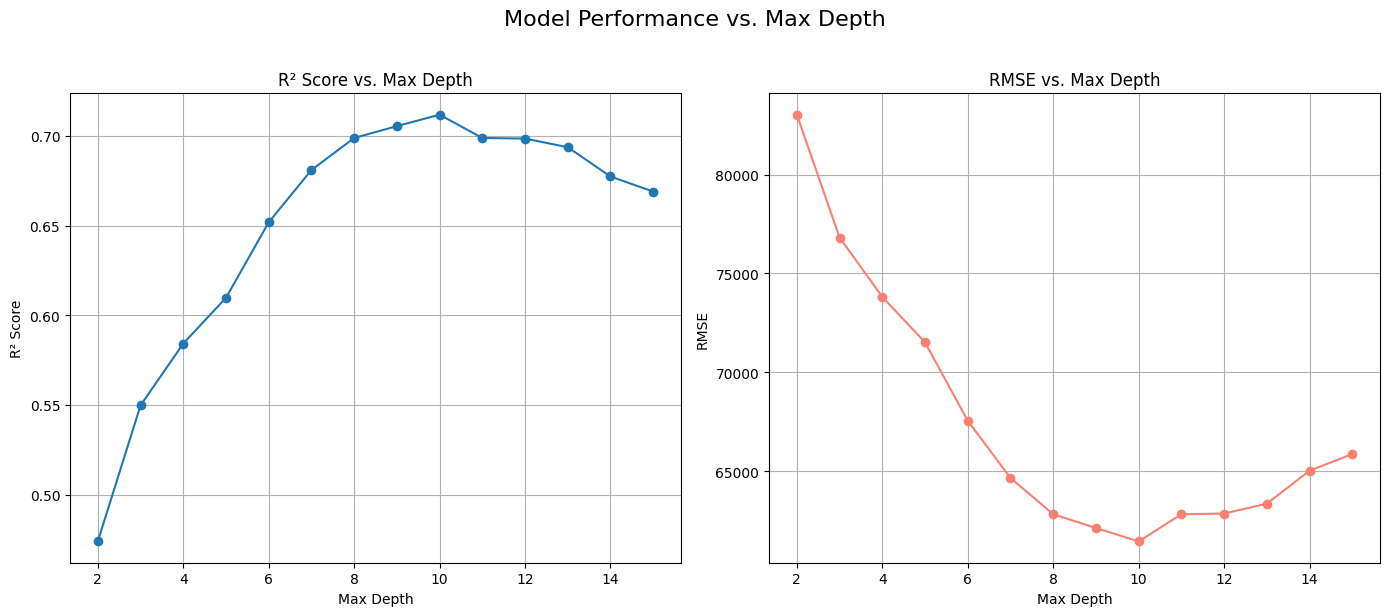

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot R2 scores
axes[0].plot(max_depth_range, r2_scores, marker='o')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score vs. Max Depth')
axes[0].grid(True)

# Plot RMSE scores
axes[1].plot(max_depth_range, rmse_scores, marker='o', color='salmon')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE vs. Max Depth')
axes[1].grid(True)

fig.suptitle('Model Performance vs. Max Depth', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Conclusão**

A poda é essencial para evitar que a árvore de regressão se torne complexa demais e sofra overfitting. Ao aplicar o CCP alpha, reduzimos ramos que pouco contribuem para a previsão, tornando o modelo mais simples e generalizável. A árvore podada encontrada no ponto de menor MSE equilibra precisão e robustez, mantendo apenas as divisões realmente relevantes para explicar o valor dos imóveis.